In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

In [49]:
from google.colab import files
uploaded = files.upload()

Saving Dry_Bean_Dataset.csv to Dry_Bean_Dataset (3).csv


In [50]:
dataset = pd.read_csv('Dry_Bean_Dataset.csv')
dataset.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [51]:
dataset.shape

(13611, 17)

In [52]:
dataset.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [53]:
dataset = dataset.drop(['Area','Perimeter'],axis=1)

<Axes: xlabel='Class', ylabel='count'>

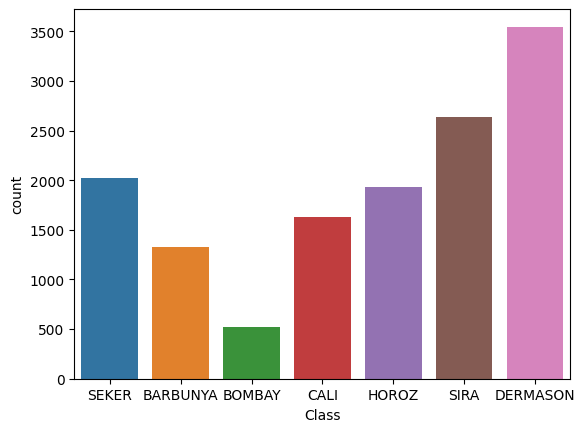

In [54]:
sns.countplot(x = 'Class', data=dataset)

In [55]:
X = dataset.iloc[:,0:-1]
y = dataset['Class']

In [56]:
ss = StandardScaler()
ss.fit_transform(X)

array([[-1.30659814, -0.63115304, -1.56505251, ...,  2.40217287,
         1.92572347,  0.83837103],
       [-1.39591111, -0.43444458, -1.96978438, ...,  3.10089314,
         2.68970162,  0.77113842],
       [-1.25235661, -0.58573461, -1.51429132, ...,  2.23509147,
         1.84135576,  0.91675514],
       ...,
       [-0.45047814, -0.24645586, -0.4486176 , ...,  0.28920441,
         0.33632829,  0.39025114],
       [-0.42897404, -0.26674226, -0.38073532, ...,  0.22837538,
         0.2489734 ,  0.03644001],
       [-0.2917356 , -0.44622403,  0.14837437, ..., -0.12777587,
        -0.2764814 ,  0.71371948]])

In [57]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [58]:
samples

[(       MajorAxisLength  MinorAxisLength  AspectRation  Eccentricity  \
  10704       233.001523       151.202562      1.540989      0.760845   
  13145       264.960115       182.588263      1.451134      0.724651   
  2571        368.601069       234.202503      1.573856      0.772198   
  4683        405.850888       238.557776      1.701269      0.809009   
  12624       254.183543       176.478601      1.440308      0.719690   
  ...                ...              ...           ...           ...   
  13123       263.034496       183.384980      1.434330      0.716887   
  3264        417.536420       262.719645      1.589285      0.777232   
  9845        316.185620       207.028992      1.527253      0.755828   
  10799       239.405409       148.484842      1.612322      0.784425   
  2732        378.651095       237.909773      1.591574      0.777964   
  
         ConvexArea  EquivDiameter    Extent  Solidity  roundness  Compactness  \
  10704       27753     187.086491  0.7

In [59]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [60]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

In [61]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.4 Best Kernel =  linear Best Nu =  5.54 Best Epsilon =  4.9
Best Accuracy =  0.52 Best Kernel =  poly Best Nu =  0.75 Best Epsilon =  7.06
Best Accuracy =  0.38 Best Kernel =  rbf Best Nu =  0.71 Best Epsilon =  9.03
Best Accuracy =  0.68 Best Kernel =  linear Best Nu =  5.57 Best Epsilon =  7.16
Best Accuracy =  0.36 Best Kernel =  linear Best Nu =  2.18 Best Epsilon =  9.96
Best Accuracy =  0.64 Best Kernel =  linear Best Nu =  0.35 Best Epsilon =  2.1
Best Accuracy =  0.54 Best Kernel =  linear Best Nu =  8.53 Best Epsilon =  0.46
Best Accuracy =  0.57 Best Kernel =  linear Best Nu =  1.92 Best Epsilon =  8.99
Best Accuracy =  0.38 Best Kernel =  rbf Best Nu =  9.42 Best Epsilon =  0.16
Best Accuracy =  0.56 Best Kernel =  linear Best Nu =  2.85 Best Epsilon =  9.82


In [62]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.40,linear,5.54,4.90
1,2,0.52,poly,0.75,7.06
2,3,0.38,rbf,0.71,9.03
3,4,0.68,linear,5.57,7.16
4,5,0.36,linear,2.18,9.96
5,6,0.64,linear,0.35,2.10
6,7,0.54,linear,8.53,0.46
7,8,0.57,linear,1.92,8.99
8,9,0.38,rbf,9.42,0.16
9,10,0.56,linear,2.85,9.82


In [63]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [64]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

In [65]:
train_sizes

array([  85,  258,  432,  605,  778,  951, 1125, 1298, 1471, 1644, 1818,
       1991, 2164, 2337, 2510, 2684, 2857, 3030, 3203, 3377, 3550, 3723,
       3896, 4070, 4243, 4416, 4589, 4762, 4936, 5109, 5282, 5455, 5629,
       5802, 5975, 6148, 6322, 6495, 6668, 6841, 7014, 7188, 7361, 7534,
       7707, 7881, 8054, 8227, 8400, 8574])

In [66]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)     

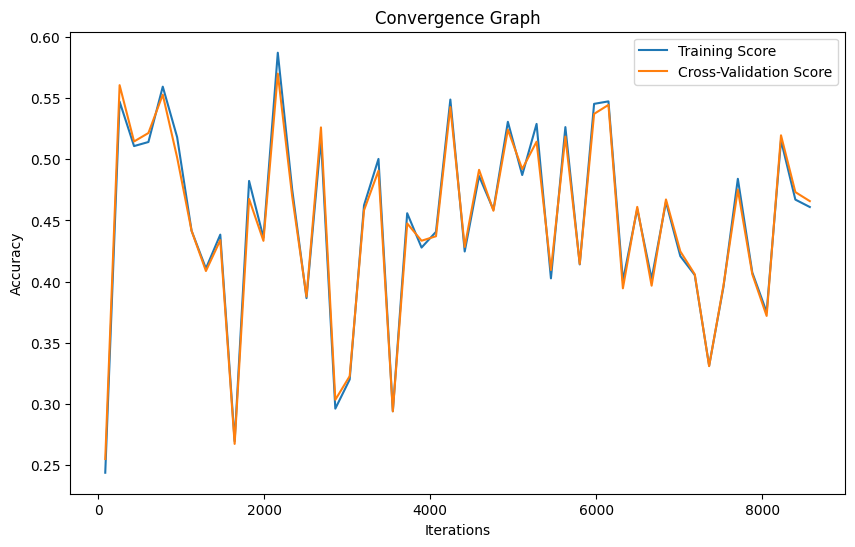

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()